# Google Search Analysis with Python

### Install pytrends - an unofficial API for Google Trends which is used to analyse the daily searches on Google

In [2]:
!pip install pytrends

### Import all the required libraries

In [3]:
import pandas as pd                     # importing pandas to store and visualise data
from pytrends.request import TrendReq   # importing a method TrendReq from pytrends.request library
import matplotlib.pyplot as plt         # importing matplotlib to plot the graphs
trends = TrendReq()

### Script for analysing the Google search trends on the qeries based on "Climate Change". Here, a dataframe of the top 10 countries is considered

In [6]:
trends.build_payload(kw_list=["Climate Change"])
data = trends.interest_by_region()                  # to find the popularity in the region worldwide
data = data.sort_values(by="Climate Change", ascending=False)
data = data.head(10)                               # loading just top 10 countries
print(data)

              Climate Change
geoName                     
Fiji                     100
Zimbabwe                  28
Ethiopia                  28
Philippines               20
Zambia                    17
Jamaica                   15
New Zealand               13
Nepal                     13
South Africa              11
Australia                 11


NOTE: The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term.

### From the above results, Fiji has the highest search query in "Climate Change"

### Visualisation of data using bar chart

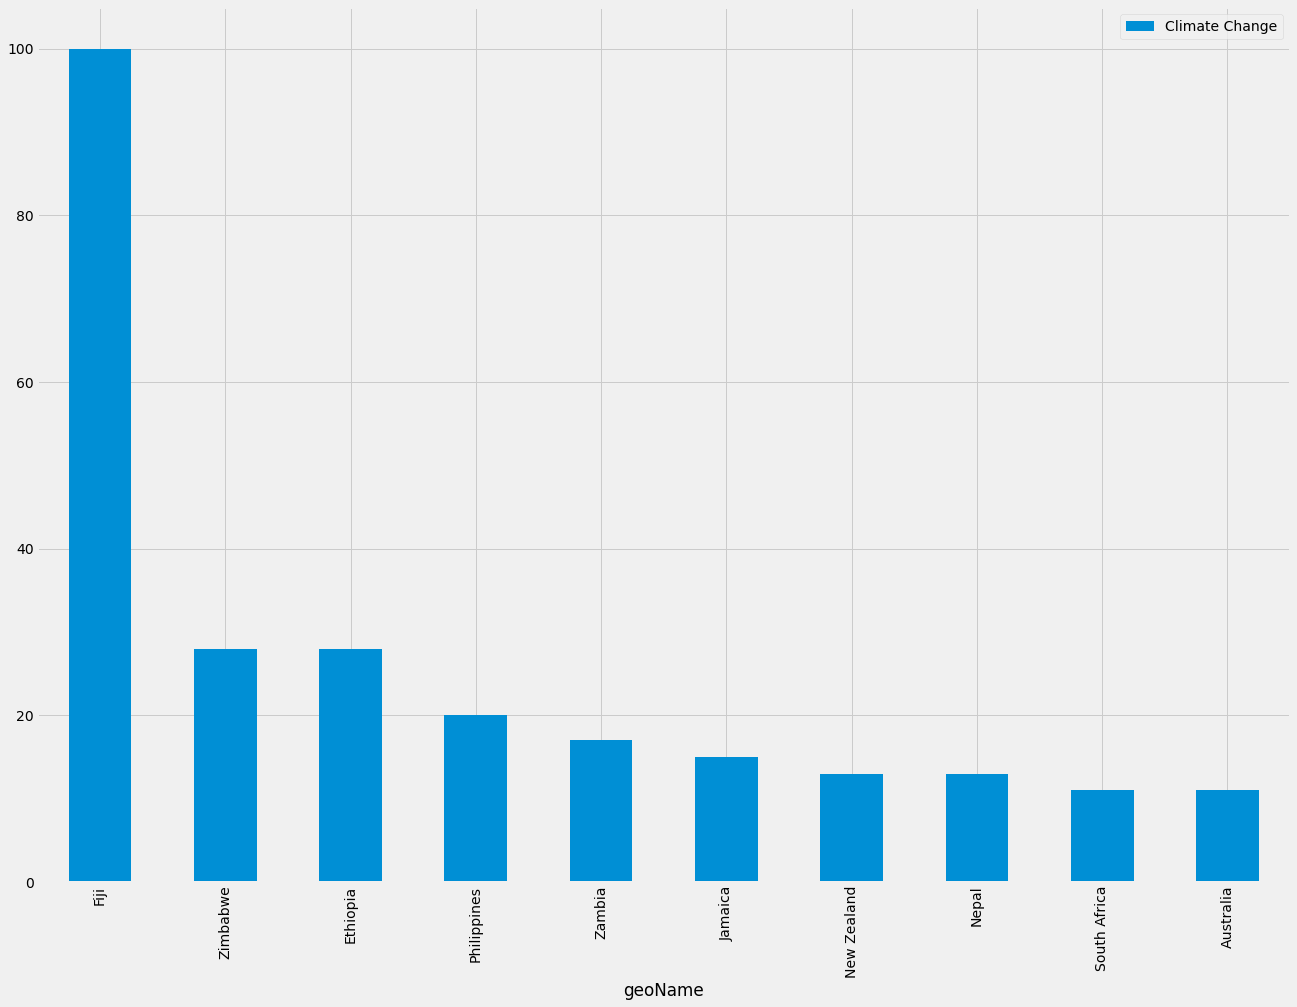

In [8]:
data.reset_index().plot(x="geoName", y="Climate Change", figsize=(20,15), kind="bar")
plt.style.use('fivethirtyeight')
plt.show()

### We know that climate change has been a major global concern so here's a look at the trend of searches over the past few years

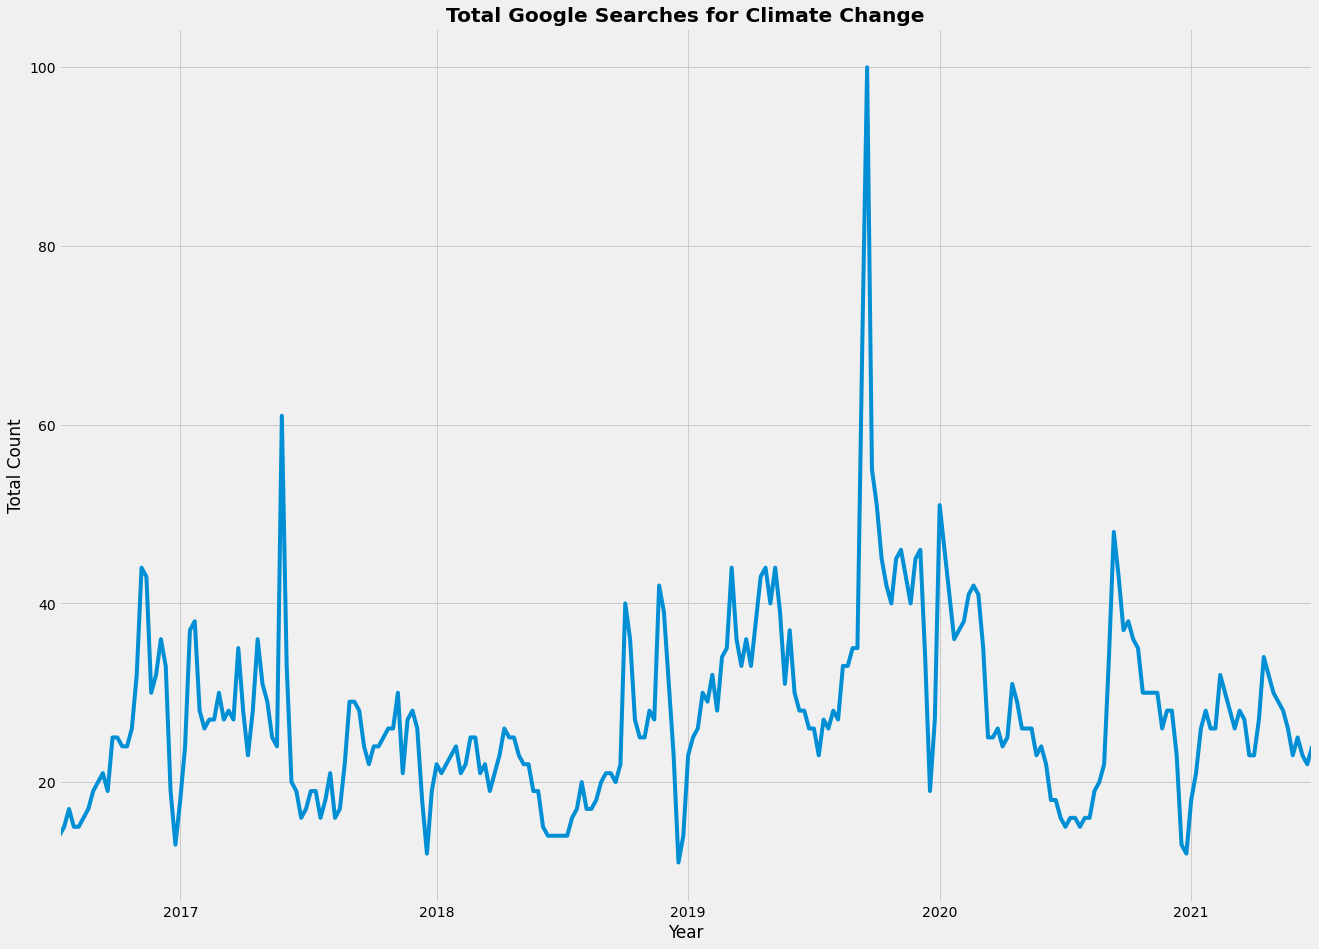

In [10]:
data = TrendReq(hl='en-US', tz=360)
data.build_payload(kw_list=['Climate Change'])
data = data.interest_over_time()
fig, ax = plt.subplots(figsize=(20, 15))
data['Climate Change'].plot()
plt.style.use('fivethirtyeight')
plt.title('Total Google Searches for Climate Change', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Count')
plt.show()

## Conclusion:

We can observe that the searches based on "Climate Change" on Google started to increase in 2017 but eventually lost it's lusture until 2020. The highest searches were done in 2020 and currently we can observe that the queries have gradually decreased.

# Daily Search Trends
To get the top daily search trends worldwide. 

In [15]:
# Get Google Hot Trends data
# the search is done worldwide when we do not pass any parameter to the method trending_searches() 

df = trends.trending_searches()    
df.head()

,0
0,Fourth of July
1,Joey Chestnut
2,Happy 4th of July
3,4th of July
4,Rachel Nichols


In [13]:
# Get Google Hot Trends data for a specific country 
df = trends.trending_searches(pn='india')
df.head()

,0
0,Sara's movie
1,Kalyan Singh
2,Sri Lanka vs England
3,Swami Vivekananda
4,Smriti Mandhana


In [16]:
# Get Google Top Charts for the year 2020 in India

df = trends.top_charts(2020, hl='en-IN', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,
